In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from cf_matrix import make_confusion_matrix

Загружаем датасет с помощью pandas

In [79]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df = pd.read_csv('data/diabetes.csv', header=None, names=col_names)
diabetes_df = diabetes_df[1:]

Смотрим структуру

In [80]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


Выделяем целевую переменную и факторы

In [82]:
Y = diabetes_df["Outcome"]
X = diabetes_df.drop(['Outcome'], axis=1)

Разделяем набор данных на обучающую и тестовую выборки

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

Строим модель логистической регрессии

In [84]:
cls = LogisticRegression()

Обучим наш классификатор на обучающей выборке

In [85]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Сделаем предсказания по нашему классификатору на тестовой выборке для оценки эффективности полученной модели

In [86]:
y_pred = cls.predict(x_test)

Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

<img src="conf_matrix_desc.png">

In [87]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[89, 10],
       [24, 31]])

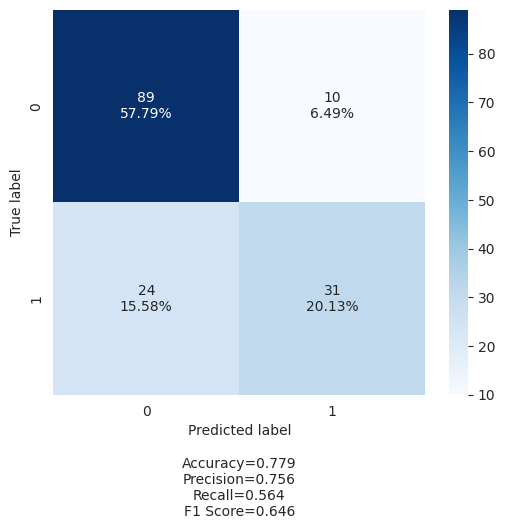

In [88]:
make_confusion_matrix(conf_matrix, figsize=(6,5), cbar=True)

Text(0.5, 23.52222222222222, 'Предсказанные значения')

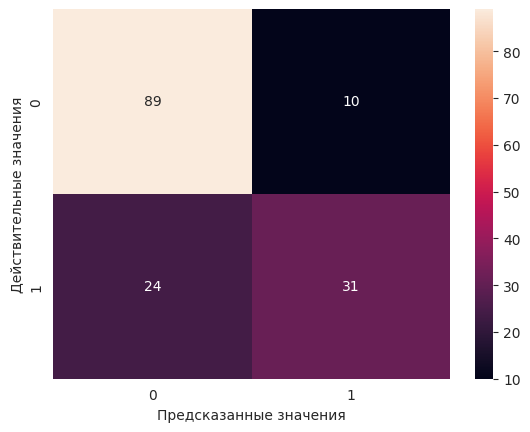

In [89]:
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

### Описание
1. 89 - это кол-во тех людей, у которых нет диабета и модель предсказала это верно
2. 31 - это кол-во тех людей, у которых есть диабет и модель предсказала это верно
3. 24 - это кол-во тех людей, у которых в действительности есть диабет, но модель предсказала, что его нет (плохо)
4. 10 - это кол-во людей, у которых нет диабета, но модель предсказала, что он есть (плохо, но не очень)

### Обозначение
1. 89 - true negative, классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
2. 24 -   false negative, классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.
3. 31 -  true positive, классификатор верно отнёс объект к рассматриваемому классу.
4. 10 -  false positive, классификатор неверно отнёс объект к рассматриваемому классу.

In [90]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [91]:
conf_matrix

array([[89, 10],
       [24, 31]])

In [92]:
TP = conf_matrix[1][1] # True positive - 31
TN = conf_matrix[0][0] # True negative - 89
FP = conf_matrix[0][1] # False positive - 10
FN = conf_matrix[1][0] # False negative - 24

### Оценка метрик

In [93]:
print(f"Метрика достоверности предсказания (Accuracy): {metrics.accuracy_score(y_test, y_pred)}, Проверка: Accuracy = (TN + TP)/(TN + FP + TP + FN) = {(TN + TP)/(TN + FP + TP + FN)}\n")
print(f"Метрика точности (Precision): {metrics.precision_score(y_test, y_pred, pos_label='1')}, Проверка: Precision = TP / (TP + FP) = {TP / (TP + FP)}\n")
print(f"Метрика полноты (Recall): {metrics.recall_score(y_test, y_pred, pos_label='1')}, Проверка: Recall = TP / (TP + FN) = {TP / (TP + FN)}\n")

Метрика достоверности предсказания (Accuracy): 0.7792207792207793, Проверка: Accuracy = (TN + TP)/(TN + FP + TP + FN) = 0.7792207792207793

Метрика точности (Precision): 0.7560975609756098, Проверка: Precision = TP / (TP + FP) = 0.7560975609756098

Метрика полноты (Recall): 0.5636363636363636, Проверка: Recall = TP / (TP + FN) = 0.5636363636363636

